In [204]:
import pandas as pd
import numpy as np
import warnings
from scipy.stats import uniform
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [205]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN

In [206]:
warnings.filterwarnings('ignore')

#### Import the data sets

In [207]:
df_cust = pd.read_csv("data/olist_customers_dataset.csv")
df_order_items = pd.read_csv("data/olist_order_items_dataset.csv")
df_order_pmts = pd.read_csv("data/olist_order_payments_dataset.csv")
df_order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("data/olist_orders_dataset.csv")
df_products = pd.read_csv("data/olist_products_dataset.csv")
df_prod_cat = pd.read_csv("data/product_category_name_translation.csv")

In [209]:
# Customer data
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [210]:
# Order data
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [211]:
# Order items data
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [212]:
# Product attributes data
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [213]:
# Order reviews data
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [214]:
# Product category translation data
df_prod_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [215]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [216]:
df_cust.shape

(99441, 5)

In [217]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [218]:
df_orders.shape

(99441, 8)

In [225]:
df_orders.order_id.nunique()

99441

In [226]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [227]:
df_order_items.shape

(112650, 7)

In [228]:
df_order_items.order_id.nunique()

98666

An order can have more than one item. Some orders don't appear to have an item and these can be ignored.

In [229]:
df_order_pmts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [230]:
df_order_pmts.shape

(103886, 5)

In [231]:
df_order_pmts['order_id'].nunique()

99440

An order can have more than one payment, and a payment can be in installments.

In [232]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [233]:
df_order_reviews.shape

(99224, 7)

In [234]:
df_order_reviews.order_id.nunique()

98673

In [235]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [236]:
df_products.shape

(32951, 9)

In [237]:
df_prod_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [238]:
df_prod_cat.shape

(71, 2)

In [239]:
df_products['product_category_name'].nunique()

73

Two categories do not have a translation. The original names can be used in place.

In [240]:
df_order_items['order_id'].nunique()

98666

In [241]:
df_orders['order_id'].nunique()

99441

Some orders do not have an item and these can be ignored.

In [242]:
df_order_pmts['order_id'].nunique()

99440

#### Exploring the data visually

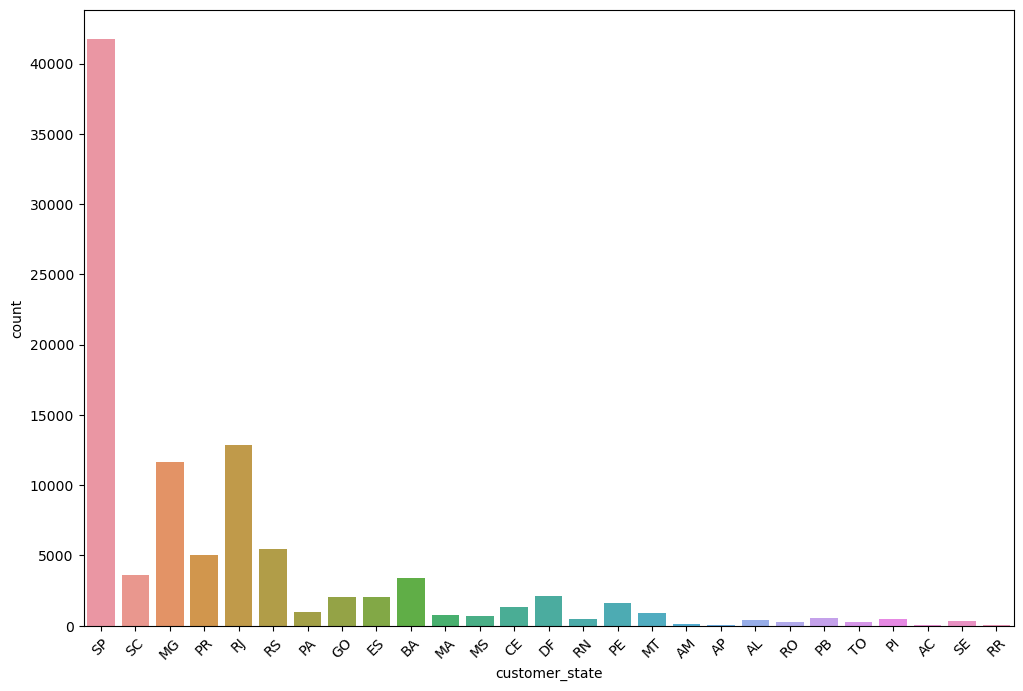

In [249]:
# Customer state
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df_cust, x = 'customer_state')
plt.xticks(rotation=45)
plt.show()

Almost half the customers are from one state, Sao Paolo.

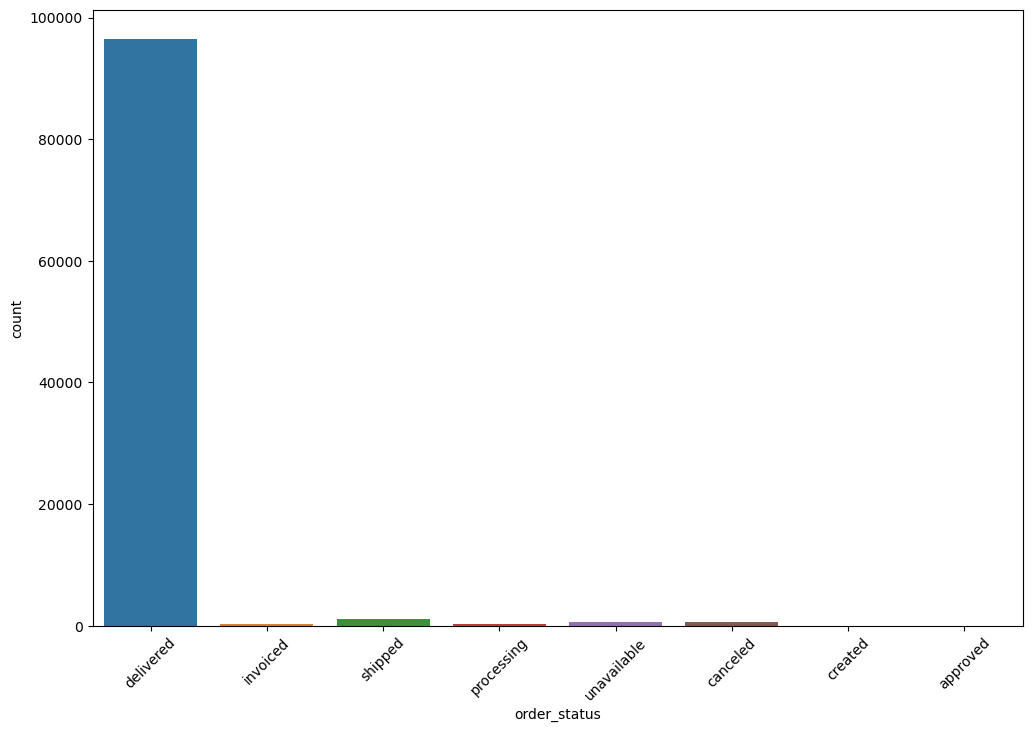

In [250]:
# Order status
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df_orders, x = 'order_status')
plt.xticks(rotation=45)
plt.show()

In [251]:
df_orders.groupby('order_status').size()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
dtype: int64

In [252]:
df_orders.groupby('order_status').size().apply(lambda x: 100 * x / df_orders.shape[0])

order_status
approved        0.002011
canceled        0.628513
created         0.005028
delivered      97.020344
invoiced        0.315765
processing      0.302692
shipped         1.113223
unavailable     0.612423
dtype: float64

Almost all the orders are delivered, with very few cancels.

<Axes: xlabel='price', ylabel='Count'>

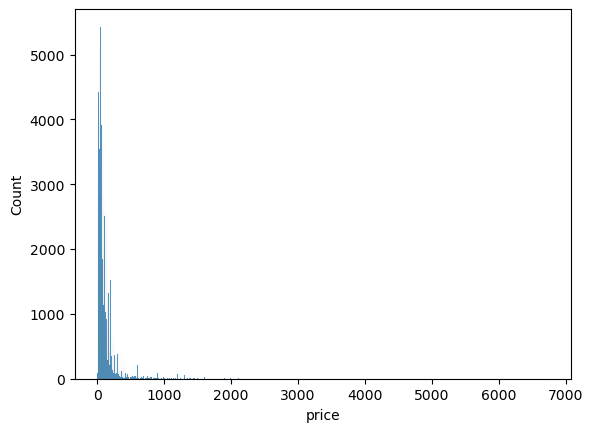

In [253]:
# Order item price distribution
sns.histplot(data=df_order_items, x='price')

<Axes: xlabel='price', ylabel='Count'>

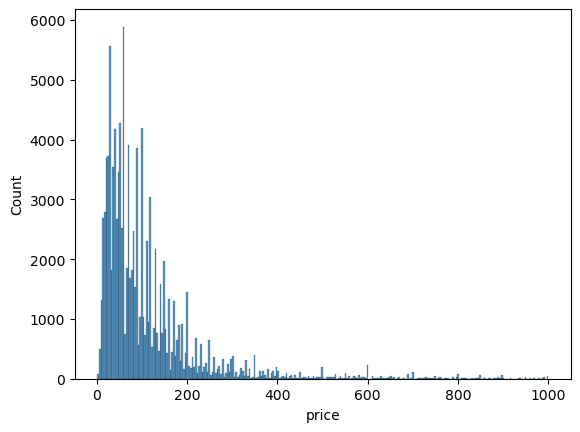

In [254]:
sns.histplot(data = df_order_items.query('price <= 1000'), x = 'price')

<Axes: xlabel='price'>

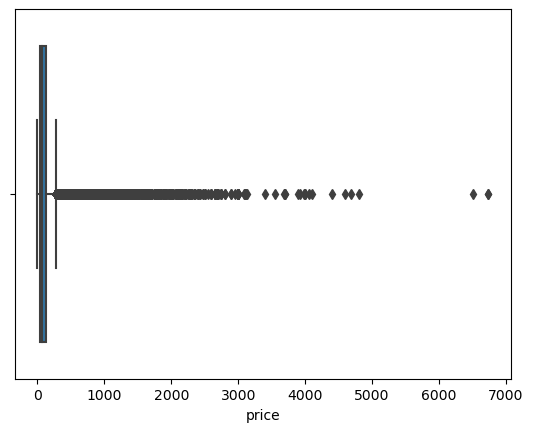

In [255]:
sns.boxplot(data=df_order_items, x='price')

Most items are less than R$ 200.

<Axes: xlabel='freight_value', ylabel='Count'>

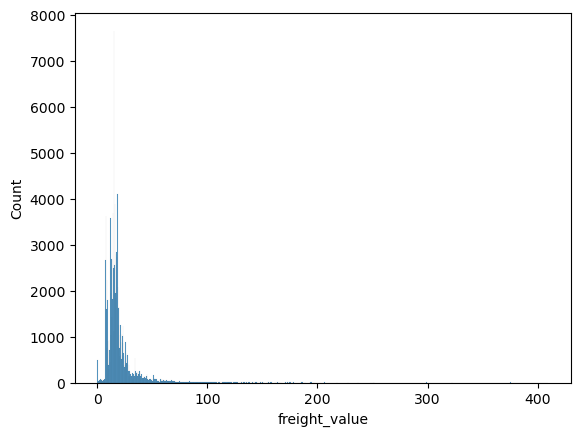

In [39]:
# Order freight price distribution
sns.histplot(data=df_order_items, x='freight_value')

<Axes: xlabel='freight_value', ylabel='Count'>

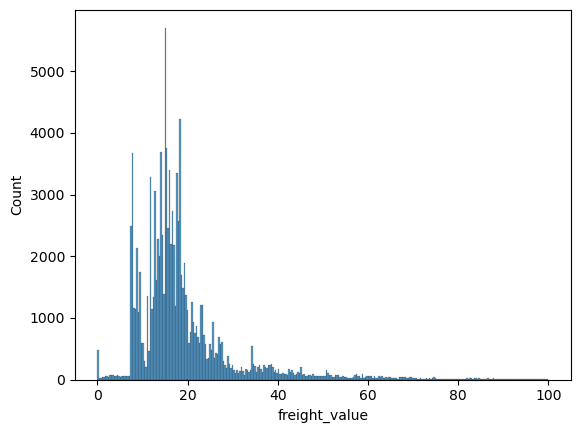

In [40]:
sns.histplot(data = df_order_items.query('freight_value <= 100'), x = 'freight_value')

<Axes: xlabel='freight_value'>

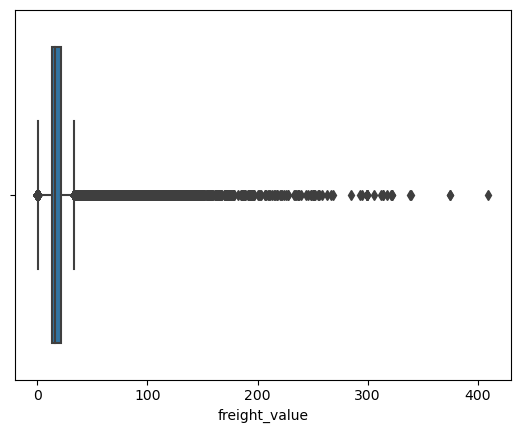

In [256]:
sns.boxplot(data=df_order_items, x='freight_value')

Most items cost less than R$ 40 for shipping.

In [263]:
# Combine products with product category name translation
df_prod_w_cat = df_products.merge(df_prod_cat, on='product_category_name', how='left')
df_prod_w_cat

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [264]:
df_prod_w_cat['product_category_name_english'].nunique()

71

In [265]:
# For the two missing translations, use the original category name
df_prod_w_cat['product_category_name_english'].fillna(df_prod_w_cat['product_category_name'], inplace=True)

In [266]:
df_prod_w_cat['product_category_name_english'].nunique()

73

In [267]:
df_prod_w_cat.rename(columns={'product_category_name_english': 'category'}, inplace=True)
df_prod_w_cat.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [268]:
# Combine order item and product dataframes
df_order_items_product = df_order_items.merge(df_prod_w_cat, on='product_id', how='inner')

In [269]:
df_order_items_product.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,furniture_decor
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0,watches_gifts
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0,sports_leisure
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79,cama_mesa_banho,47.0,511.0,1.0,600.0,30.0,3.0,19.0,bed_bath_table


In [270]:
# Get the top 25 categories
top_categories = df_order_items_product['category'].value_counts().index[:25]

In [271]:
# Filter dataframe to include only the top 25 categories
df_top_categories = df_order_items_product[df_order_items_product['category'].isin(top_categories)]

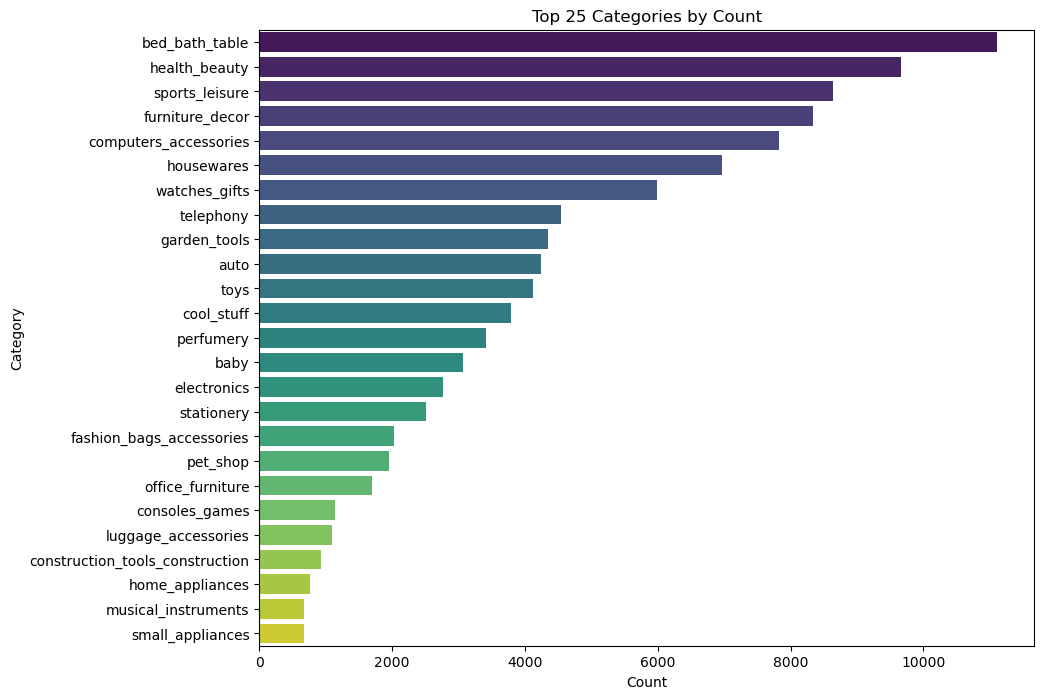

In [272]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_top_categories, y='category', order=top_categories, palette='viridis')
plt.title('Top 25 Categories by Count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

Majority of the sales come from the top 20 categories. The rest can be combined into an 'other' category for analysis.

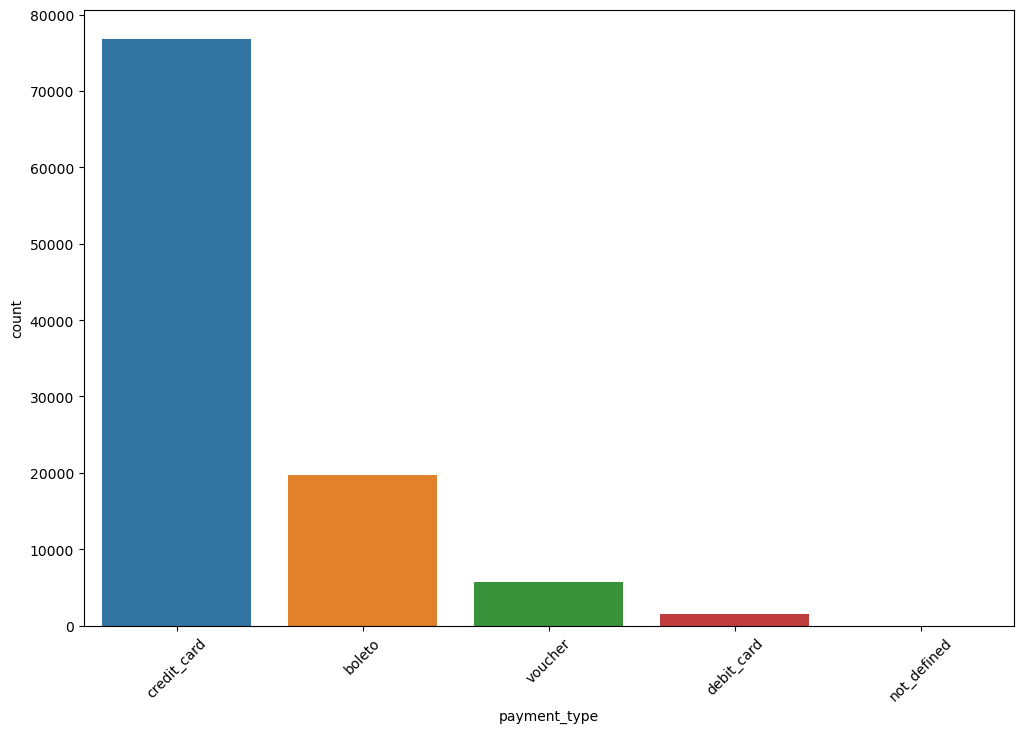

In [273]:
# Order payments
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df_order_pmts, x = 'payment_type')
plt.xticks(rotation=45)
plt.show()

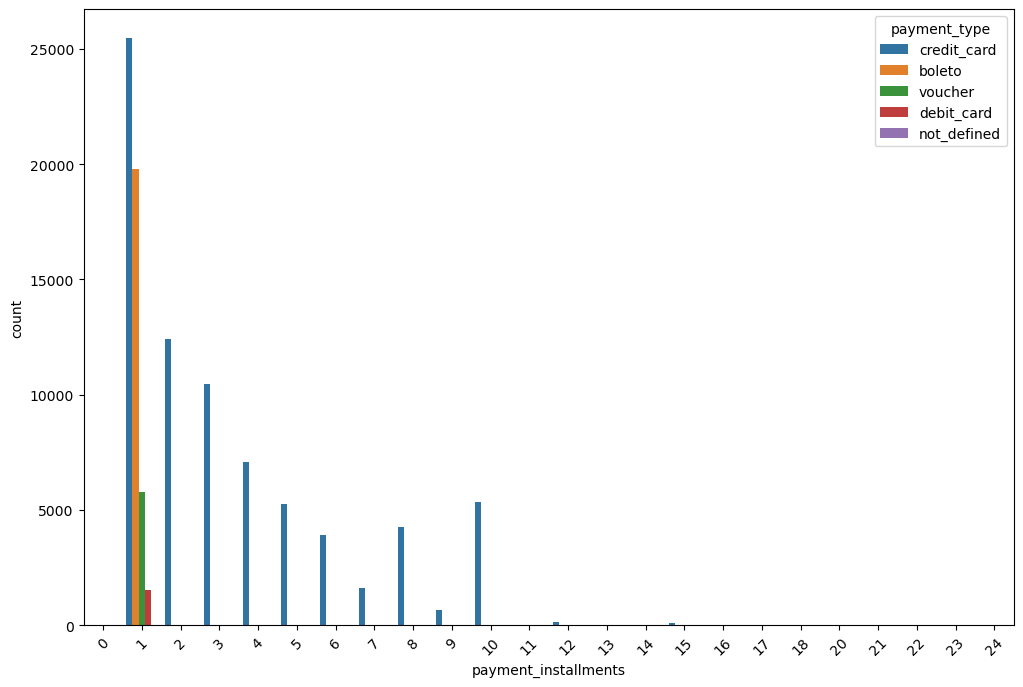

In [274]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df_order_pmts, x = 'payment_installments', hue = 'payment_type')
plt.xticks(rotation=45)
plt.show()

In [275]:
# Create a function to group number of installments 1 through 7, and the rest to '8 or more'
def categorize_installments(x):
    if x <= 7:
        return str(x)
    else:
        return '8 or more'

df_order_pmts['num_installments'] = df_order_pmts['payment_installments'].apply(categorize_installments)

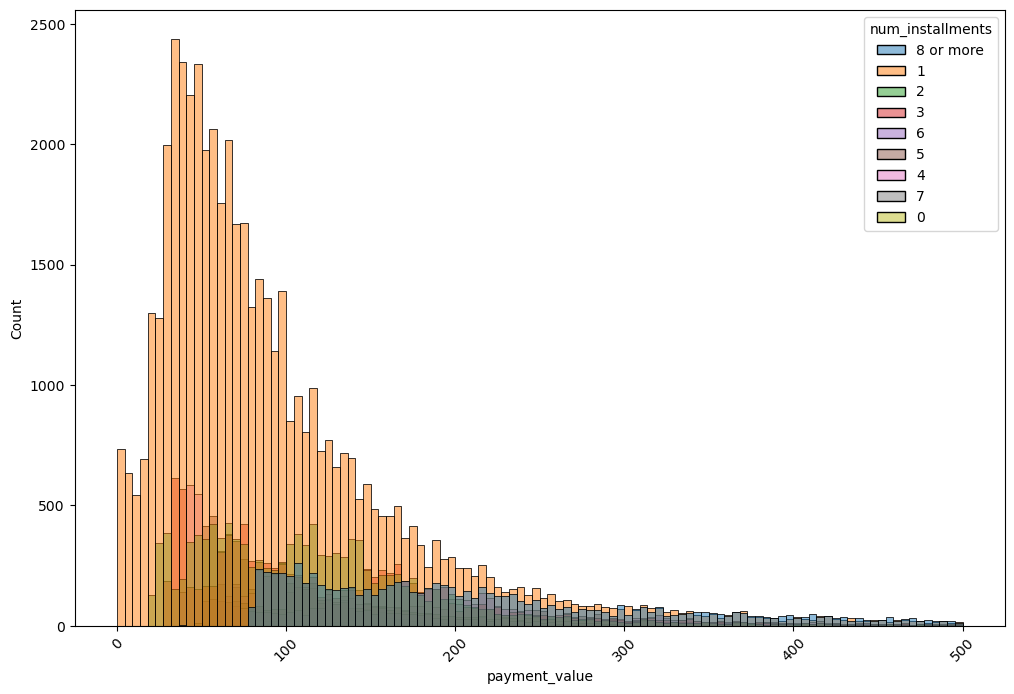

In [276]:

plt.figure(figsize=(12, 8))
ax3 = sns.histplot(data = df_order_pmts.query('payment_value <= 500'), x = 'payment_value', hue='num_installments')
plt.xticks(rotation=45)
plt.show()

As the order value increases, more orders are paid with multiple installments.

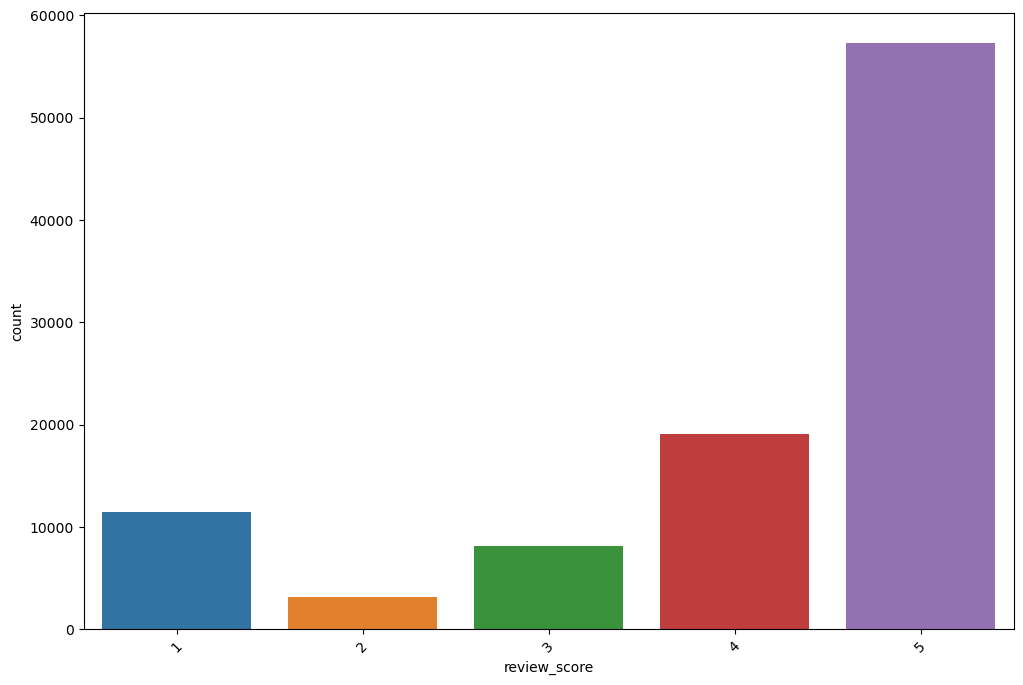

In [55]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(data = df_order_reviews, x = 'review_score')
plt.xticks(rotation=45)
plt.show()

### Combine customers, orders, order items, order payments, order reviews and products
#### Aggregate order, order items, order payments, order views and product category info at the customer level, in order to analyze customers
#### 

In [279]:
# Combine customer unique id with order id, order purchase timestamp from orders
df_combined = pd.merge(df_cust[['customer_id','customer_unique_id']], df_orders[['order_id','customer_id','order_purchase_timestamp']], on='customer_id')

In [280]:
# Combine with order items - product, price, freight and category
df_combined = df_combined.merge(df_order_items_product[['order_id','order_item_id','product_id','price','freight_value','category']], on='order_id')

In [281]:
# Get average order rating for each order, since there can be multiple reviews per order
df_order_rating = df_order_reviews.groupby('order_id').agg({'review_score': 'mean'})
df_order_rating.tail()

,review_score
order_id,
fffc94f6ce00a00581880bf54a75a037,5.0
fffcd46ef2263f404302a634eb57f7eb,5.0
fffce4705a9662cd70adb13d4a31832d,5.0
fffe18544ffabc95dfada21779c9644f,5.0
fffe41c64501cc87c801fd61db3f6244,5.0


In [282]:
# Combine with order rating 
df_combined = df_combined.merge(df_order_rating, on='order_id')

In [283]:
# An order can have more than one payment. Get total number of payment installments per order.
df_order_pmts_by_order = df_order_pmts.groupby('order_id').agg({'payment_installments': 'sum'})

In [284]:
# Combine with order payments
df_combined = df_combined.merge(df_order_pmts_by_order, on='order_id')

In [285]:
df_combined.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,category,review_score,payment_installments
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture,4.0,2
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,housewares,5.0,8
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,office_furniture,5.0,7
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,office_furniture,5.0,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,home_confort,5.0,8


In [286]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111705 entries, 0 to 111704
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               111705 non-null  object 
 1   customer_unique_id        111705 non-null  object 
 2   order_id                  111705 non-null  object 
 3   order_purchase_timestamp  111705 non-null  object 
 4   order_item_id             111705 non-null  int64  
 5   product_id                111705 non-null  object 
 6   price                     111705 non-null  float64
 7   freight_value             111705 non-null  float64
 8   category                  110116 non-null  object 
 9   review_score              111705 non-null  float64
 10  payment_installments      111705 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 9.4+ MB


In [287]:
# Generate binary features for top 20 categories, and another binary feature 'other' category for all others
top_20_categories = df_combined['category'].value_counts().index[:20]
top_20_categories

Index(['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor',
       'computers_accessories', 'housewares', 'watches_gifts', 'telephony',
       'garden_tools', 'auto', 'toys', 'cool_stuff', 'perfumery', 'baby',
       'electronics', 'stationery', 'fashion_bags_accessories', 'pet_shop',
       'office_furniture', 'consoles_games'],
      dtype='object', name='category')

In [288]:
# Create binary features for each of the top 20 categories
for category in top_20_categories:
    df_combined[category] = df_combined['category'].apply(lambda x: 1 if x == category else 0)

In [289]:
# Create a binary feature for the 'Other' category
df_combined['Other'] = df_combined['category'].apply(lambda x: 1 if x not in top_categories else 0)

In [290]:
# Add price and freight to get total order amount
df_combined['total_price'] = df_combined['price'] + df_combined['freight_value']
df_combined.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,category,review_score,payment_installments,bed_bath_table,health_beauty,sports_leisure,furniture_decor,computers_accessories,housewares,watches_gifts,telephony,garden_tools,auto,toys,cool_stuff,perfumery,baby,electronics,stationery,fashion_bags_accessories,pet_shop,office_furniture,consoles_games,Other,total_price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,office_furniture,4.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,housewares,5.0,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,office_furniture,5.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,office_furniture,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,home_confort,5.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,252.25


In [291]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111705 entries, 0 to 111704
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               111705 non-null  object 
 1   customer_unique_id        111705 non-null  object 
 2   order_id                  111705 non-null  object 
 3   order_purchase_timestamp  111705 non-null  object 
 4   order_item_id             111705 non-null  int64  
 5   product_id                111705 non-null  object 
 6   price                     111705 non-null  float64
 7   freight_value             111705 non-null  float64
 8   category                  110116 non-null  object 
 9   review_score              111705 non-null  float64
 10  payment_installments      111705 non-null  int64  
 11  bed_bath_table            111705 non-null  int64  
 12  health_beauty             111705 non-null  int64  
 13  sports_leisure            111705 non-null  i

In [295]:
# Generate dataframe at unique customer id level
# For every customer, get order count, last order timestamp, item count, total price, average price,
# average rating, average payment installments.
# And for each of the 20 categories, get binary indicator if customer purchased from the category
df_final = df_combined.groupby('customer_unique_id').agg(
    order_count = pd.NamedAgg(column='order_id', aggfunc='count'),
    last_order_date = pd.NamedAgg(column='order_purchase_timestamp', aggfunc='max'),
    item_count = pd.NamedAgg(column='product_id', aggfunc='count'),
    total_order_value = pd.NamedAgg(column='total_price', aggfunc='sum'),
    avg_order_value = pd.NamedAgg(column='total_price', aggfunc='mean'),
    avg_rating = pd.NamedAgg(column='review_score', aggfunc='mean'),
    avg_installments = pd.NamedAgg(column='payment_installments', aggfunc='mean'),
    bed_bath_table = pd.NamedAgg(column='bed_bath_table', aggfunc='max'),
    health_beauty = pd.NamedAgg(column='health_beauty', aggfunc='max'),
    sports_leisure = pd.NamedAgg(column='sports_leisure', aggfunc='max'),
    furniture_decor = pd.NamedAgg(column='furniture_decor', aggfunc='max'),
    computers_accessories = pd.NamedAgg(column='computers_accessories', aggfunc='max'),
    housewares = pd.NamedAgg(column='housewares', aggfunc='max'),
    watches_gifts = pd.NamedAgg(column='watches_gifts', aggfunc='max'),
    telephony = pd.NamedAgg(column='telephony', aggfunc='max'),
    garden_tools = pd.NamedAgg(column='garden_tools', aggfunc='max'),
    auto = pd.NamedAgg(column='auto', aggfunc='max'),
    toys = pd.NamedAgg(column='toys', aggfunc='max'),
    cool_stuff = pd.NamedAgg(column='cool_stuff', aggfunc='max'),
    perfumery = pd.NamedAgg(column='perfumery', aggfunc='max'),
    baby = pd.NamedAgg(column='baby', aggfunc='max'),
    electronics = pd.NamedAgg(column='electronics', aggfunc='max'),
    stationery = pd.NamedAgg(column='stationery', aggfunc='max'),
    fashion_bags_accessories = pd.NamedAgg(column='fashion_bags_accessories', aggfunc='max'),
    pet_shop = pd.NamedAgg(column='pet_shop', aggfunc='max'),
    office_furniture = pd.NamedAgg(column='office_furniture', aggfunc='max'),
    consoles_games = pd.NamedAgg(column='consoles_games', aggfunc='max'),
    other_categories = pd.NamedAgg(column='Other', aggfunc='max')
)

In [296]:
df_final.tail()

,order_count,last_order_date,item_count,total_order_value,avg_order_value,avg_rating,avg_installments,bed_bath_table,health_beauty,sports_leisure,furniture_decor,computers_accessories,housewares,watches_gifts,telephony,garden_tools,auto,toys,cool_stuff,perfumery,baby,electronics,stationery,fashion_bags_accessories,pet_shop,office_furniture,consoles_games,other_categories
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fffcf5a5ff07b0908bd4e2dbc735a684,2,2017-06-08 21:00:36,2,2067.42,1033.71,5.0,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1,84.58,84.58,4.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1,112.46,112.46,5.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,1,133.69,133.69,5.0,5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffffd2657e2aad2907e67c3e9daecbeb,1,2017-05-02 20:18:45,1,71.56,71.56,5.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [297]:
# Convert last_order_date to datetime
df_final['last_order_date'] = df_final['last_order_date'].apply(pd.to_datetime)

In [299]:
# Add a recency feature relative to last order date in the data set
# Get last order date in the data set
df_final['last_order_date'].max()

Timestamp('2018-09-03 09:06:57')

In [300]:
# Add recency column: number of days since the last order
df_final['recency'] = (pd.to_datetime('2018-09-04') - df_final['last_order_date']).dt.days

In [301]:
df_final.drop(columns='last_order_date', inplace=True)
df_final.tail()

,order_count,item_count,total_order_value,avg_order_value,avg_rating,avg_installments,bed_bath_table,health_beauty,sports_leisure,furniture_decor,computers_accessories,housewares,watches_gifts,telephony,garden_tools,auto,toys,cool_stuff,perfumery,baby,electronics,stationery,fashion_bags_accessories,pet_shop,office_furniture,consoles_games,other_categories,recency
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fffcf5a5ff07b0908bd4e2dbc735a684,2,2,2067.42,1033.71,5.0,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,452
fffea47cd6d3cc0a88bd621562a9d061,1,1,84.58,84.58,4.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,267
ffff371b4d645b6ecea244b27531430a,1,1,112.46,112.46,5.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,573
ffff5962728ec6157033ef9805bacc48,1,1,133.69,133.69,5.0,5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124
ffffd2657e2aad2907e67c3e9daecbeb,1,1,71.56,71.56,5.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,489


In [302]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94720 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_count               94720 non-null  int64  
 1   item_count                94720 non-null  int64  
 2   total_order_value         94720 non-null  float64
 3   avg_order_value           94720 non-null  float64
 4   avg_rating                94720 non-null  float64
 5   avg_installments          94720 non-null  float64
 6   bed_bath_table            94720 non-null  int64  
 7   health_beauty             94720 non-null  int64  
 8   sports_leisure            94720 non-null  int64  
 9   furniture_decor           94720 non-null  int64  
 10  computers_accessories     94720 non-null  int64  
 11  housewares                94720 non-null  int64  
 12  watches_gifts             94720 non-null  int64  
 13  telephon

In [303]:
df_final.describe()

,order_count,item_count,total_order_value,avg_order_value,avg_rating,avg_installments,bed_bath_table,health_beauty,sports_leisure,furniture_decor,computers_accessories,housewares,watches_gifts,telephony,garden_tools,auto,toys,cool_stuff,perfumery,baby,electronics,stationery,fashion_bags_accessories,pet_shop,office_furniture,consoles_games,other_categories,recency
count,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000,94720.000000
mean,1.179318,1.179318,165.748545,146.556200,4.102215,2.967272,0.095513,0.090942,0.078832,0.066174,0.068834,0.061033,0.058055,0.043528,0.036603,0.040467,0.040234,0.037817,0.032855,0.029930,0.026626,0.024071,0.018898,0.017736,0.013239,0.011064,0.094098,243.338978
std,0.616014,0.616014,227.106060,197.649556,1.326808,2.718191,0.293924,0.287528,0.269478,0.248587,0.253174,0.239391,0.233849,0.204044,0.187785,0.197052,0.196509,0.190754,0.178257,0.170396,0.160988,0.153270,0.136165,0.131993,0.114297,0.104603,0.291967,153.164269
min,1.000000,1.000000,9.590000,9.341429,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,63.100000,57.790000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000
50%,1.000000,1.000000,107.850000,96.660000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,224.000000
75%,1.000000,1.000000,182.910000,163.122500,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,353.000000
max,24.000000,24.000000,13664.080000,6929.310000,5.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,729.000000


#### Scale the dataset before running analysis

In [305]:
# Scale the dataset
df_scaled = (df_final - df_final.mean())/df_final.std()

In [306]:
# Run PCA on the scaled dataset to select the top principal components
pca = PCA(n_components=8, random_state=42)
df_components = pca.fit_transform(df_scaled)

#### KMeans clustering

#### Run GridSearch to tune hyperparameter number of clusters

In [373]:
params = {'n_clusters': range(2,21)}
knn_grid = GridSearchCV(KMeans(), param_grid=params)
knn_grid.fit(df_components)

GridSearchCV(estimator=KMeans(), param_grid={'n_clusters': range(2, 21)})

In [374]:
knn_grid.cv_results_

{'mean_fit_time': array([0.77115269, 0.56242566, 0.75392022, 1.07070584, 0.90244064,
        1.0821528 , 0.89599171, 1.04973488, 1.11330633, 1.36667509,
        1.32695494, 1.83079858, 2.30709558, 2.28888588, 1.91062646,
        2.14019551, 2.08684335, 2.33825836, 2.2553268 ]),
 'std_fit_time': array([0.3139217 , 0.08871343, 0.11861499, 0.29568211, 0.26534416,
        0.41143191, 0.1905449 , 0.24220045, 0.19236668, 0.31649791,
        0.50627864, 0.30602602, 0.30302571, 0.45985835, 0.37722017,
        0.41461129, 0.44075419, 0.22037334, 0.28075035]),
 'mean_score_time': array([0.00493941, 0.0035707 , 0.00518303, 0.00656042, 0.00289545,
        0.00334206, 0.00352592, 0.00290003, 0.00403447, 0.00336714,
        0.00582943, 0.00267844, 0.00223098, 0.00906177, 0.00342994,
        0.01309896, 0.00241404, 0.00241241, 0.02402768]),
 'std_score_time': array([0.00492488, 0.00027249, 0.00302912, 0.00621056, 0.00058595,
        0.00032051, 0.00036813, 0.00060431, 0.00176991, 0.00079144,
        

In [375]:
raw_scores = (knn_grid.cv_results_['mean_test_score'].tolist())
scores = [-1 * i for i in raw_scores]

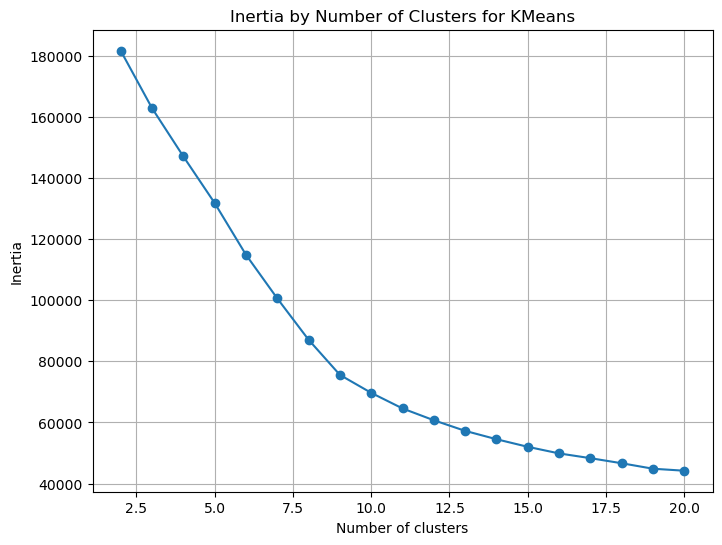

In [376]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 21), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia by Number of Clusters for KMeans')
plt.grid(True)
plt.show()

#### Nine clusters seems to be optimal

Run KMeans with 9 clusters

In [384]:
kmeans = KMeans(n_clusters=9, random_state=42).fit(df_components)

In [385]:
# Assign cluster labels to the original dataset
df_clustered = df_final.copy()
df_clustered['cluster'] = kmeans.labels_

In [386]:
df_clustered['cluster'].value_counts()

cluster
1    26905
4    24502
7     8510
3     8247
8     8038
0     7022
6     6180
2     2773
5     2543
Name: count, dtype: int64

In [387]:
df_clustered.groupby('cluster')['order_count'].mean()

cluster
0    1.108089
1    1.096450
2    3.870177
3    1.093974
4    1.069545
5    1.092411
6    1.119579
7    1.154172
8    1.112839
Name: order_count, dtype: float64

<Axes: xlabel='cluster', ylabel='order_count'>

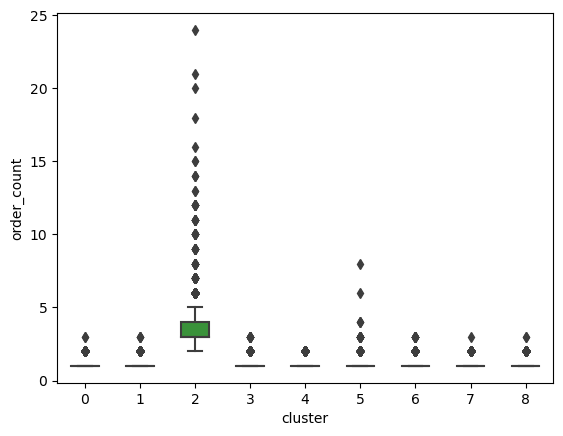

In [388]:
sns.boxplot(data=df_clustered, y="order_count", x="cluster", width=.5)

In [389]:
df_clustered.groupby('cluster')['item_count'].mean()

cluster
0    1.108089
1    1.096450
2    3.870177
3    1.093974
4    1.069545
5    1.092411
6    1.119579
7    1.154172
8    1.112839
Name: item_count, dtype: float64

<Axes: xlabel='cluster', ylabel='item_count'>

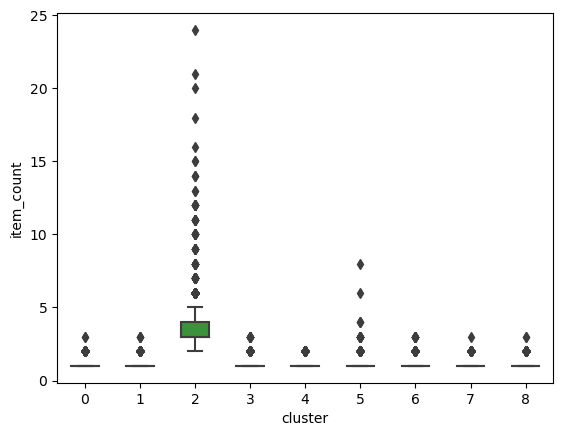

In [390]:
sns.boxplot(data=df_clustered, y="item_count", x="cluster", width=.5)

In [391]:
df_clustered.groupby('cluster')['total_order_value'].mean()

cluster
0     133.597569
1     132.790388
2     369.753682
3     145.784570
4     126.611400
5    1096.643748
6     133.263780
7     128.557203
8     143.400445
Name: total_order_value, dtype: float64

<Axes: xlabel='cluster', ylabel='total_order_value'>

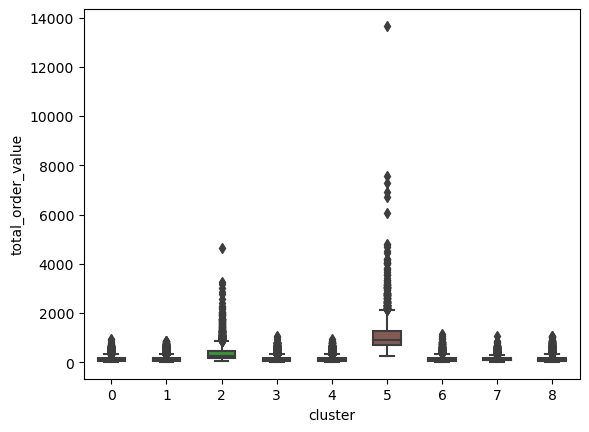

In [392]:
sns.boxplot(data=df_clustered, y="total_order_value", x="cluster", width=.5)

In [393]:
df_clustered.groupby('cluster')['avg_order_value'].mean()

cluster
0     122.433979
1     123.523232
2      96.005092
3     136.604387
4     120.013501
5    1027.014326
6     119.520546
7     112.789193
8     131.268914
Name: avg_order_value, dtype: float64

<Axes: xlabel='cluster', ylabel='avg_order_value'>

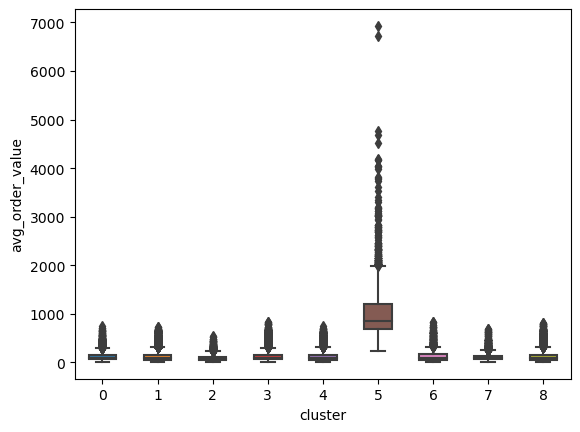

In [394]:
sns.boxplot(data=df_clustered, y="avg_order_value", x="cluster", width=.5)

In [395]:
df_clustered.groupby('cluster')['avg_rating'].mean()

cluster
0    4.188859
1    4.093449
2    3.549289
3    4.187674
4    4.185179
5    3.974177
6    4.052319
7    3.986545
8    4.107365
Name: avg_rating, dtype: float64

<Axes: xlabel='cluster', ylabel='avg_rating'>

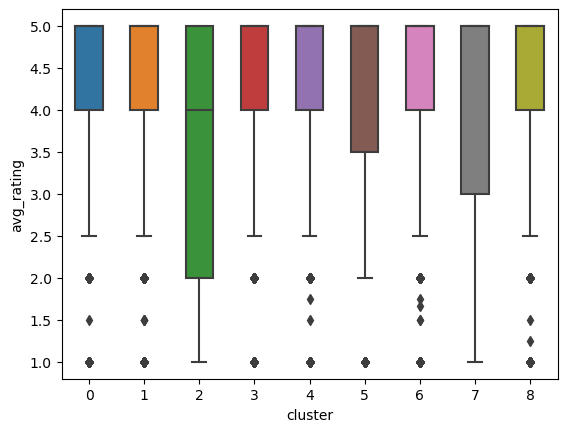

In [396]:
sns.boxplot(data=df_clustered, y="avg_rating", x="cluster", width=.5)

In [397]:
df_clustered.groupby('cluster')['avg_installments'].mean()

cluster
0    2.395305
1    2.958217
2    3.820581
3    3.003597
4    2.665905
5    7.251016
6    2.143878
7    3.614943
8    2.676350
Name: avg_installments, dtype: float64

<Axes: xlabel='cluster', ylabel='avg_installments'>

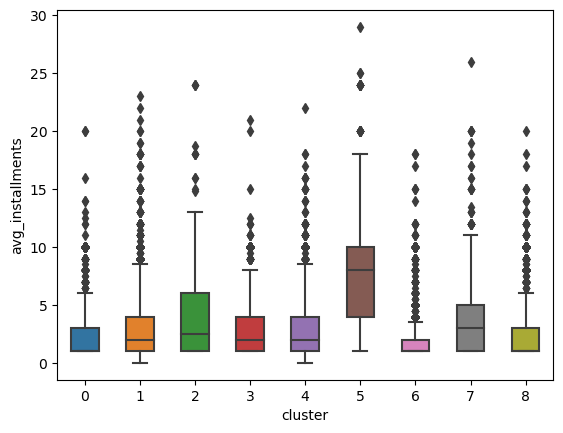

In [398]:
sns.boxplot(data=df_clustered, y="avg_installments", x="cluster", width=.5)

In [399]:
df_clustered.groupby('cluster')['recency'].mean()

cluster
0    249.668186
1    309.231072
2    236.988821
3    220.855099
4    180.291609
5    247.423122
6    234.487702
7    246.605170
8    236.753919
Name: recency, dtype: float64

<Axes: xlabel='cluster', ylabel='recency'>

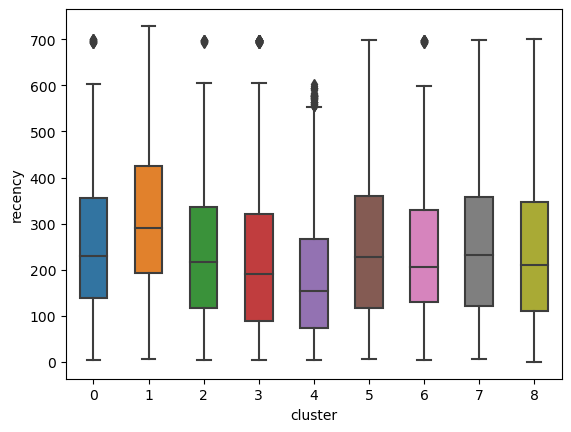

In [400]:
sns.boxplot(data=df_clustered, y="recency", x="cluster", width=.5)

In [401]:
df_clustered.groupby('cluster')['bed_bath_table'].mean()

cluster
0    0.000427
1    0.000000
2    0.171295
3    0.001213
4    0.000000
5    0.009831
6    0.001618
7    0.998120
8    0.003732
Name: bed_bath_table, dtype: float64

<Axes: xlabel='cluster', ylabel='bed_bath_table'>

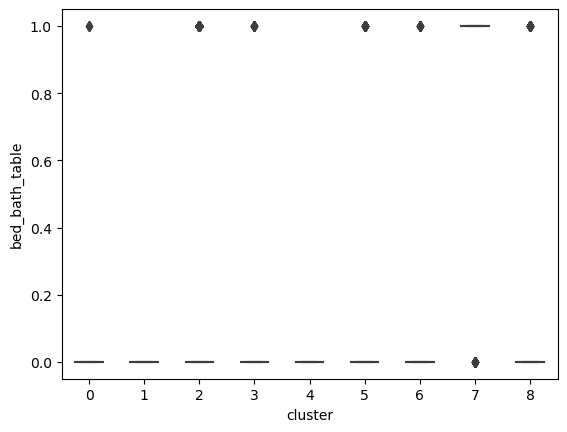

In [402]:
sns.boxplot(data=df_clustered, y="bed_bath_table", x="cluster", width=.5)

In [403]:
df_clustered.groupby('cluster')['health_beauty'].mean()

cluster
0    0.000000
1    0.000000
2    0.062748
3    1.000000
4    0.000000
5    0.067243
6    0.000971
7    0.001175
8    0.000746
Name: health_beauty, dtype: float64

<Axes: xlabel='cluster', ylabel='health_beauty'>

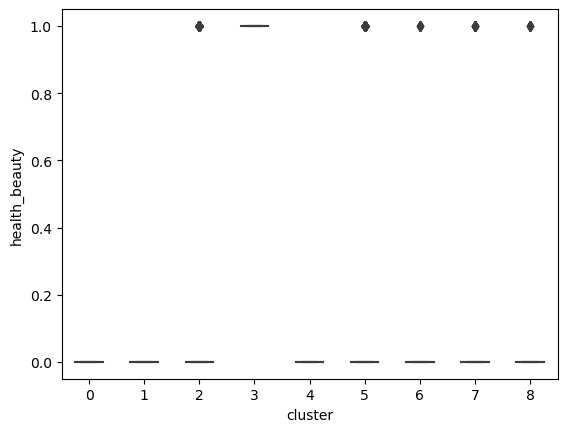

In [404]:
sns.boxplot(data=df_clustered, y="health_beauty", x="cluster", width=.5)

In [405]:
df_clustered.groupby('cluster')['sports_leisure'].mean()

cluster
0    1.000000
1    0.000260
2    0.086909
3    0.003638
4    0.000041
5    0.044042
6    0.001780
7    0.000588
8    0.004728
Name: sports_leisure, dtype: float64

In [406]:
df_clustered.groupby('cluster')['furniture_decor'].mean()

cluster
0    0.001994
1    0.202750
2    0.205554
3    0.001819
4    0.001714
5    0.012977
6    0.000971
7    0.009401
8    0.006594
Name: furniture_decor, dtype: float64

In [407]:
df_clustered.groupby('cluster')['computers_accessories'].mean()

cluster
0    0.000000
1    0.000112
2    0.089073
3    0.000364
4    0.000000
5    0.036964
6    0.998382
7    0.000235
8    0.000124
Name: computers_accessories, dtype: float64

In [408]:
df_clustered.groupby('cluster')['housewares'].mean()

cluster
0    0.002563
1    0.008772
2    0.106744
3    0.001091
4    0.208024
5    0.020842
6    0.002427
7    0.003055
8    0.003857
Name: housewares, dtype: float64

In [409]:
df_clustered.groupby('cluster')['watches_gifts'].mean()

cluster
0    0.002279
1    0.000112
2    0.038947
3    0.001091
4    0.196106
5    0.212741
6    0.000324
7    0.000823
8    0.000995
Name: watches_gifts, dtype: float64

In [410]:
df_clustered.groupby('cluster')['telephony'].mean()

cluster
0    0.000854
1    0.128229
2    0.021277
3    0.001213
4    0.019998
5    0.026740
6    0.003883
7    0.000940
8    0.000995
Name: telephony, dtype: float64

In [411]:
df_clustered.groupby('cluster')['garden_tools'].mean()

cluster
0    0.001139
1    0.112693
2    0.069960
3    0.000485
4    0.003224
5    0.042470
6    0.002427
7    0.001058
8    0.002239
Name: garden_tools, dtype: float64

In [412]:
df_clustered.groupby('cluster')['auto'].mean()

cluster
0    0.000854
1    0.011299
2    0.031735
3    0.000606
4    0.132193
5    0.066064
6    0.001456
7    0.000940
8    0.000746
Name: auto, dtype: float64

In [413]:
df_clustered.groupby('cluster')['toys'].mean()

cluster
0    0.000854
1    0.107861
2    0.024162
3    0.000728
4    0.029467
5    0.031852
6    0.000809
7    0.001058
8    0.001617
Name: toys, dtype: float64

In [414]:
df_clustered.groupby('cluster')['cool_stuff'].mean()

cluster
0    0.000570
1    0.122988
2    0.021277
3    0.000728
4    0.000000
5    0.064884
6    0.001456
7    0.001880
8    0.001742
Name: cool_stuff, dtype: float64

In [415]:
df_clustered.groupby('cluster')['perfumery'].mean()

cluster
0    0.001282
1    0.090058
2    0.023440
3    0.002546
4    0.022610
5    0.003539
6    0.000000
7    0.002233
8    0.001493
Name: perfumery, dtype: float64

In [416]:
df_clustered.groupby('cluster')['baby'].mean()

cluster
0    0.000427
1    0.025163
2    0.024522
3    0.000485
4    0.078443
5    0.044436
6    0.000485
7    0.003643
8    0.001742
Name: baby, dtype: float64

In [417]:
df_clustered.groupby('cluster')['electronics'].mean()

cluster
0    0.001139
1    0.000818
2    0.019473
3    0.000485
4    0.097992
5    0.005505
6    0.001133
7    0.000588
8    0.000871
Name: electronics, dtype: float64

In [418]:
df_clustered.groupby('cluster')['stationery'].mean()

cluster
0    0.000427
1    0.006504
2    0.018031
3    0.001455
4    0.082401
5    0.003932
6    0.000809
7    0.000353
8    0.000373
Name: stationery, dtype: float64

In [419]:
df_clustered.groupby('cluster')['fashion_bags_accessories'].mean()

cluster
0    0.000997
1    0.049805
2    0.027768
3    0.000728
4    0.013387
5    0.004719
6    0.000485
7    0.000353
8    0.001742
Name: fashion_bags_accessories, dtype: float64

In [420]:
df_clustered.groupby('cluster')['pet_shop'].mean()

cluster
0    0.000142
1    0.011968
2    0.022719
3    0.000485
4    0.049996
5    0.015729
6    0.000809
7    0.001058
8    0.001368
Name: pet_shop, dtype: float64

In [421]:
df_clustered.groupby('cluster')['office_furniture'].mean()

cluster
0    0.000142
1    0.041108
2    0.034980
3    0.000243
4    0.000082
5    0.012190
6    0.000647
7    0.000235
8    0.001120
Name: office_furniture, dtype: float64

In [422]:
df_clustered.groupby('cluster')['consoles_games'].mean()

cluster
0    0.000142
1    0.035867
2    0.005770
3    0.000243
4    0.000122
5    0.020842
6    0.000324
7    0.000235
8    0.000498
Name: consoles_games, dtype: float64

In [423]:
df_clustered.groupby('cluster')['other_categories'].mean()

cluster
0    0.000142
1    0.000000
2    0.138478
3    0.002183
4    0.000163
5    0.157688
6    0.003074
7    0.005640
8    1.000000
Name: other_categories, dtype: float64

##### Results

The nine clusters represent distinct groups of customers, each with its own characteristics.

Cluster 0 - 7000 customers, most of them have purchased from the sports-leisure category.

Cluster 1 - 26900 customers. This group has not purchased in 309 days, on average. Some have purchased from furniture-decor category.

Cluster 2 - 2700 customers. The average order value is lower than other groups, but they have a higher repeat rate (3.87 orders per customer on average). They also tend to give lower rating than other groups. Some have purchased from furniture-decor category.

Cluster 3 - 8200 customers, most of them have purchased from the health-beauty category. Some have purchased from watches-gifts categories.

Cluster 4 - 24500 customers, pay over the lowest number of installments. They have the lowest recency (180 days since last purchase on average). Some have purchased housewares category.

Cluster 5 - 2500 customers, high value customers who spend more than R$ 1000 on average. Perhaps due to high order value, these customers pay over 7+ installments on average.

Cluster 6 - 6200 customers - most have purchased from computers-accessories category.

Cluster 7 - 8500 customers, most of them have purchased from the bed-bath-table category.

Cluster 8 - 8000 customers, they are purchasers of categories other than the top 20 categories.